In [1]:
# import python libraries and packages
from textblob import TextBlob
import json
import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style
import pandas as pd
import numpy as np
from itertools import *
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
# path for json files
file1 = 'Musical_Instruments_5.json'
# json_data = open(file_name)
file2 = 'Amazon_Instant_Video_5.json'
# json_data = open(file_name)

In [3]:
# data = pd.read_json(file_name,lines=True)
amazon_data = []
with open(file1) as f:
    for count,line in islice(enumerate(f), 2500):
        amazon_data.append(json.loads(line))
with open(file2) as f:
    for count,line in islice(enumerate(f), 2500):
        amazon_data.append(json.loads(line))

In [4]:
# observation #4997 in python list
amazon_data[4997]

{'asin': 'B001F6ZIXC',
 'helpful': [1, 3],
 'overall': 3.0,
 'reviewText': 'This is an ok show, a bit too much Sopranos lite biker edition without the strong lead(s). Just because a guy looks menacing doesn\'t mean he doesn\'t have to be that way.I thought the female lead was pretty good, probably the most believable part of this show.I like the way it depicts how mc\'s are in fact OC, just more adapted to the modern world than the cosa nostra is. So RICOH makes sense, I\'m not sure if that\'s been tried against them in the real world. They have the obvious advantage of fixing/building motorcycles. It does a good job depicting how a lot of people leave their hometowns to get away from things, etc.I don\'t get the whole theme of Jacks\' fathers manuscript, there are no specifics and it is never realized how it makes a difference in the plot. I\'m watching season 2 and it still seems to have no relevance. The way they set it up it seemed like every episode was going to be an object lesso

In [5]:
# observation #4995 in python list
amazon_data[4995]

{'asin': 'B001EXRQQ8',
 'helpful': [2, 2],
 'overall': 5.0,
 'reviewText': 'What a great show!BEST SEASON ENDING (of a crime TV show) OF THE DECADE!All the other writers for TV can learn here how it`s really done....',
 'reviewTime': '12 7, 2009',
 'reviewerID': 'A33LMH8SBNUA76',
 'reviewerName': 'Wolfgang "Film & TV"',
 'summary': 'MUST BUY! Best crime show of the year',
 'unixReviewTime': 1260144000}

In [6]:
# convert python list to pandas dataframe
amz_df = pd.DataFrame(amazon_data)
amz_df.shape

(5000, 9)

In [7]:
# show dataframe tail
amz_df.tail()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
4995,B001EXRQQ8,"[2, 2]",5.0,What a great show!BEST SEASON ENDING (of a cri...,"12 7, 2009",A33LMH8SBNUA76,"Wolfgang ""Film & TV""",MUST BUY! Best crime show of the year,1260144000
4996,B001EXRQQ8,"[0, 0]",5.0,I love this show. The balance of characters an...,"03 22, 2014",A339ST0POMIDOA,W. Paul Ashlin,Fantastic!!,1395446400
4997,B001F6ZIXC,"[1, 3]",3.0,"This is an ok show, a bit too much Sopranos li...","06 3, 2012",AHNYRCBNPYS9P,AeroEngineer,"ok series, sopranos biker lite, ugh no more mo...",1338681600
4998,B001F6ZIXC,"[0, 0]",5.0,Love this show me and my husband watch this to...,"03 14, 2014",ALD0IFTADYP9G,Amazon Customer,SOA,1394755200
4999,B001F6ZIXC,"[0, 0]",5.0,This was a surprise for me: watched the pilot...,"05 10, 2013",ASE30PCQUUH56,Amazon Customer,"Gritty, Powerful",1368144000


In [8]:
# describe dataframe
amz_df.describe()

,overall,unixReviewTime
count,5000.000000,5.000000e+03
mean,4.497000,1.348392e+09
std,0.866569,5.820814e+07
min,1.000000,9.754560e+08
25%,4.000000,1.329005e+09
50%,5.000000,1.369094e+09
75%,5.000000,1.390090e+09
max,5.000000,1.405814e+09


In [9]:
# create new dataframe and reduce to two columns 
amz_df = pd.DataFrame(amz_df)
df_reduz = amz_df[['overall', 'reviewText']]
del amz_df

In [10]:
# show new dataframe head
df_reduz.head()

,overall,reviewText
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


In [11]:
# test out the TextBlob function from textblob
sample1 = TextBlob(df_reduz['reviewText'][4997])

In [12]:
# show polarity and subjectivity of text item
sample1.sentiment

Sentiment(polarity=0.09339430894308945, subjectivity=0.5069444444444444)

In [13]:
# test out the TextBlob function from textblob
sample2 = TextBlob(df_reduz['reviewText'][4995])

In [14]:
# show polarity and subjectivity of text item
sample2.sentiment

Sentiment(polarity=0.2916666666666667, subjectivity=0.44166666666666665)

In [15]:
# use the translate function for any textblob object
sample1.translate(to="zh-CN")

TextBlob("这是一个不错的节目，有点太多的Sopranos轻骑兵版没有强大的领先优势。只是因为一个男人看起来来势汹汹并不意味着他不一定要这样。我认为女主角很不错，可能是这个节目中最可信的部分。我喜欢描绘MC如何成为OC的方式，比科萨诺斯特拉更适应现代世界。所以RICOH是有道理的，我不确定在现实世界中是否已经对它们进行了尝试。他们有固定/建造摩托车的明显优势。它很好地描述了很多人离开他们的家乡远离事物等等。我没有得到杰克斯父亲手稿的整个主题，没有具体的东西，它从来没有意识到它是如何产生影响的在情节。我正在观看第2季，它似乎仍然没有相关性。他们设置它的方式似乎每个插曲都将成为杰克斯叛乱中的一个实物教训，从未发生过。第二季更是如此，我通常喜欢随着他们的进展显示更多，或者他们变得更好，这是与此节目相反。我不认为我会在第2季过后像LOST一样，除非它变得更好。 - 描述强硬的罪犯太不切实际了。这些人不是家庭成员，也不是为犯罪分子绑架的人。这个不法分子的家庭非常天真而愚蠢。 Boyscouts这些不是。有没有犯罪期间的代码 - 请停止音乐蒙太奇，他们是如此尖刻和过头，我畏缩和快速前进 - 这真是愚蠢的警察总监超过刚刚与他的商业伙伴做生意的方式，儿子们 - 两个男主角都不是那么坚强或者可信，Jacks通常是房间里最小的男人，穿得像一个十几岁的女孩，通常情况下，最小的男人是最极端的或者最聪明的，他既不是。是自鸣得意的，而且看起来像是爷爷。")

In [16]:
# create two dataframes and string objects
mus_df = df_reduz[0:2499]
mus_str = mus_df.to_string()
ins_df = df_reduz[2500:4999]
ins_str = ins_df.to_string()

In [17]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

In [18]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


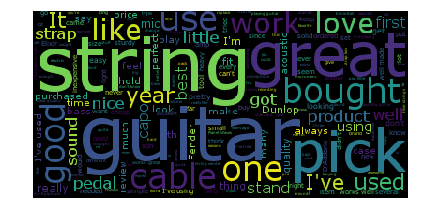

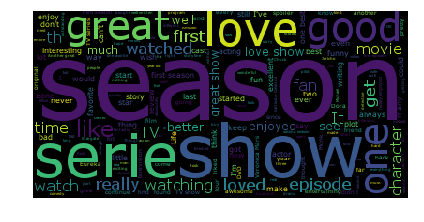

In [19]:
#create a wordclouds for string objects
mus_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(mus_str)
plt.imshow(mus_wc)
plt.axis("off")
plt.show() 
#create a wordcloud for sring objetcs
ins_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(ins_str)
plt.imshow(ins_wc)
plt.axis("off")
plt.show() 

In [20]:
# import textblob as tb
import textblob as tb

In [21]:
# create two list for sentiment analysis polarity and overall ratings
tb_review = []
overall_tb = []
for ind,review in islice(df_reduz.iterrows(),5000):
    details = TextBlob(review['reviewText'])
    tb_review.append(details.sentiment.polarity)
    overall_tb.append(review['overall'])

In [22]:
# dataframe with overall ratings and sentiment values
amz_tb = pd.DataFrame()
amz_tb['overall'] = overall_tb
amz_tb['senti_value'] = tb_review

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


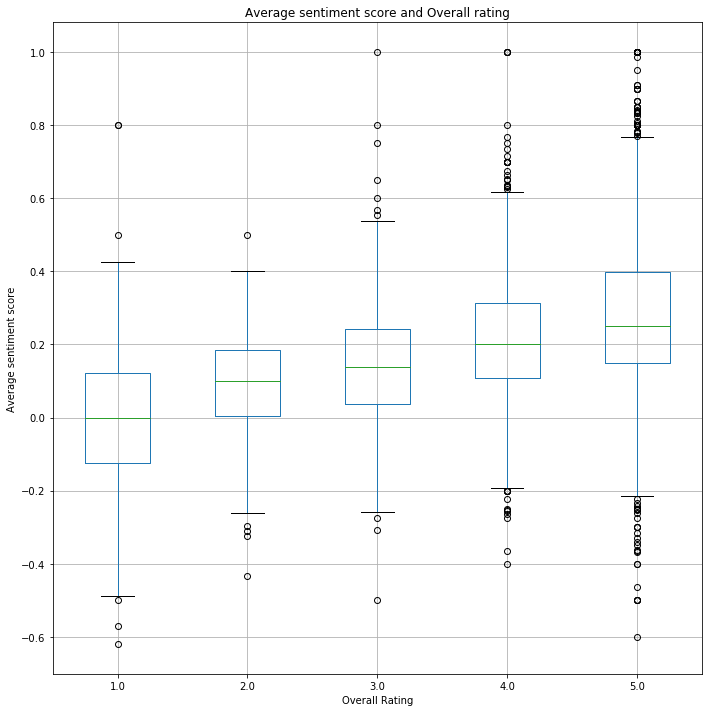

In [23]:
# plot sentiment analysis and overall ratings and compare them
az = amz_tb.boxplot(by=['overall'], figsize=(10,10))
az.get_figure().suptitle("")
az.set_title('Average sentiment score and Overall rating')
az.set_xlabel('Overall Rating')
az.set_ylabel('Average sentiment score')

In [24]:
# select the last column that has text and last 2500 observations
amzclus = df_reduz[2500:5000].iloc[:,1]

In [25]:
# from sklearn.feature_extraction import CountVectorizer feature
from sklearn.feature_extraction.text import CountVectorizer
# extracting features from train files
vecto = CountVectorizer()
X = vecto.fit_transform(amzclus) #sparse matrix structure of text data turned into numeric
X.shape #shape of the sparse matrix

(2500, 17383)

In [26]:
# transform text to matrix for cluster analysis
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape ) 

(2500, 17383)


In [27]:
from sklearn.cluster import KMeans
#a = int(input("Enter desired number of clusters: "))
#b = int(input("Enter desired random state: "))
#Number of clusters
kmeans = KMeans(n_clusters=8, random_state=39)
# Fitting the input data
kmeans = kmeans.fit(tfidf)
# Getting the cluster labels
labels = kmeans.predict(tfidf)
# Centroid values
centroids = kmeans.cluster_centers_

In [28]:
# dr_tr object to array to apply cluster label
amz_tr = pd.DataFrame(tfidf.toarray())

In [29]:
# apply cluster labesl to matrix
amz_tr['clusters'] = labels

In [30]:
# first ten rows of matrix
# amz_tr[0:10]

array([111, 255, 239, 416, 217, 449, 570, 243])

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


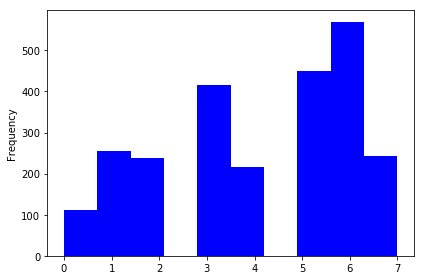

In [31]:
# histograms of clusters and frequency
amz_tr['clusters'].plot(kind='hist', color="blue")
# cluster bins 
np.bincount(labels)

In [32]:
#d = int(input("Enter cluster to view first 5 reviews in that cluster: "))
# top reviews for respective clusters
cluster_reviews_df0 = pd.DataFrame(amzclus)[labels == 0]
cluster_reviews_df0[0:5]

,reviewText
2526,"This is a cute series, and I did watch two epi..."
2535,It's basically a slightly less intelligent ver...
2543,I wish I were a part of this cast. This is the...
2579,I enjoyed nearly all the seasons of 24 and thi...
2600,This series has it all in the &#34;crime&#34; ...


In [33]:
#d = int(input("Enter cluster to view first 5 reviews in that cluster: "))
# top reviews for respective clusters
cluster_reviews_df1 = pd.DataFrame(amzclus)[labels == 1]
cluster_reviews_df1[0:5]

,reviewText
2539,It was a disappointment. I gave it a few episo...
2546,funny thing. My brother's been trying to get m...
2575,I loved this season of 24. I loved almost ever...
2585,It was Good and funny I enjoy it it is worth ...
2603,This said it was used but you couldn't tell. T...


In [34]:
#d = int(input("Enter cluster to view first 5 reviews in that cluster: "))
#top reviews for respective clusters
cluster_reviews_df2 = pd.DataFrame(amzclus)[labels == 2]
cluster_reviews_df2[0:5]

,reviewText
2502,This one is a real snoozer. Don't believe anyt...
2507,"There are many episodes in this series, so I p..."
2520,"There were some good entertainers, and some ar..."
2525,It is nice to see some of the more popular com...
2536,4.5 starsI knew nothing of this until a friend...


In [35]:
# create a dataframe for each cluster
cluster_reviews_df3 = pd.DataFrame(amzclus)[labels == 3]
cluster_reviews_df4 = pd.DataFrame(amzclus)[labels == 4]
cluster_reviews_df5 = pd.DataFrame(amzclus)[labels == 5]
cluster_reviews_df6 = pd.DataFrame(amzclus)[labels == 6]
cluster_reviews_df7 = pd.DataFrame(amzclus)[labels == 7]

In [36]:
# create a string object in dataframe
clus_str0 = cluster_reviews_df0.to_string()
clus_str1 = cluster_reviews_df1.to_string()
clus_str2 = cluster_reviews_df2.to_string()

In [37]:
# create a string object in dataframe
clus_str3 = cluster_reviews_df3.to_string()
clus_str4 = cluster_reviews_df4.to_string()
clus_str5 = cluster_reviews_df5.to_string()
clus_str6 = cluster_reviews_df6.to_string()
clus_str7 = cluster_reviews_df7.to_string()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


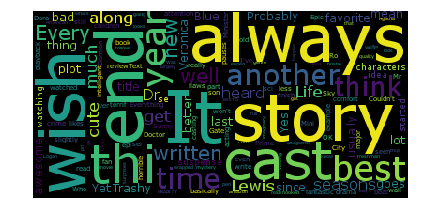

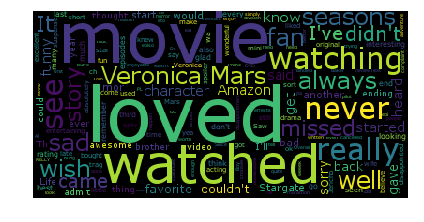

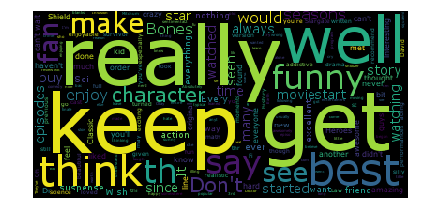

In [38]:
#create a wordcloud for cluster
clus0_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'enjoyed','love','first','season','good','two','one','TV','shows','like','series','great','review','watch','episode','serie','show','season','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(clus_str0)
plt.imshow(clus0_wc)
plt.axis("off")
plt.show() 
#create a wordcloud for cluster
clus1_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'enjoyed','love','first','season','good','two','one','TV','shows','like','series','great','review','watch','episode','serie','show','season','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(clus_str1)
plt.imshow(clus1_wc)
plt.axis("off")
plt.show() 
#create a wordcloud for cluster
clus2_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'enjoyed','love','first','season','good','two','one','TV','shows','like','series','great','review','watch','episode','serie','show','season','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(clus_str2)
plt.imshow(clus2_wc)
plt.axis("off")
plt.show() 

In [39]:
# wrap TextBlob function in string object
clus0_senti = TextBlob(clus_str0)
clus1_senti = TextBlob(clus_str1)
clus2_senti = TextBlob(clus_str2)

In [40]:
# wrap TextBlob function in string object
clus3_senti = TextBlob(clus_str3)
clus4_senti = TextBlob(clus_str4)
clus5_senti = TextBlob(clus_str5)
clus6_senti = TextBlob(clus_str6)
clus7_senti = TextBlob(clus_str7)

In [41]:
# print sentiment analysis by cluster
print(clus0_senti.sentiment)
print(clus1_senti.sentiment)
print(clus2_senti.sentiment)

Sentiment(polarity=0.30445891551482374, subjectivity=0.5306635378510378)
Sentiment(polarity=0.32267057193247684, subjectivity=0.621311539430587)
Sentiment(polarity=0.3622365945979671, subjectivity=0.6043963534377067)


In [42]:
# print sentiment analysis by cluster
print(clus3_senti.sentiment)
print(clus4_senti.sentiment)
print(clus5_senti.sentiment)
print(clus6_senti.sentiment)
print(clus7_senti.sentiment)

Sentiment(polarity=0.3146280009874716, subjectivity=0.5349525807977941)
Sentiment(polarity=0.21157562333670696, subjectivity=0.5820557111197503)
Sentiment(polarity=0.22089849687349697, subjectivity=0.5140094436427769)
Sentiment(polarity=0.2505072739557386, subjectivity=0.5725206368517782)
Sentiment(polarity=0.4486710480704891, subjectivity=0.5997259413460527)


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


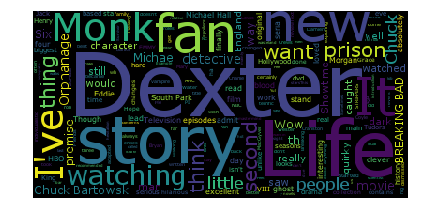

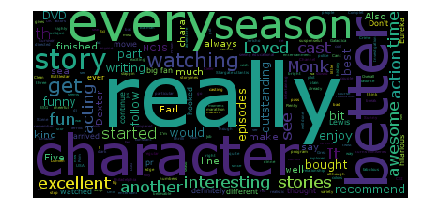

In [43]:
#create a wordcloud by cluster
clus4_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'enjoyed','love','first','season','good','two','one','TV','shows','like','series','great','review','watch','episode','serie','show','season','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(clus_str4)
plt.imshow(clus4_wc)
plt.axis("off")
plt.show() 
#create a wordcloud by cluster
clus7_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'enjoyed','love','first','season','good','two','one','TV','shows','like','series','great','review','watch','episode','serie','show','season','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(clus_str7)
plt.imshow(clus7_wc)
plt.axis("off")
plt.show() 

In [44]:
# word count by word by group  
print((clus0_senti.word_counts['enjoyed']/111)*100)
print((clus1_senti.word_counts['enjoyed']/255)*100)
print((clus2_senti.word_counts['enjoyed']/239)*100)
print((clus3_senti.word_counts['enjoyed']/416)*100)
print((clus4_senti.word_counts['enjoyed']/217)*100)
print((clus5_senti.word_counts['enjoyed']/449)*100)
print((clus6_senti.word_counts['enjoyed']/570)*100)
print((clus7_senti.word_counts['enjoyed']/243)*100)

2.7027027027027026
2.7450980392156863
0.8368200836820083
3.6057692307692304
0.9216589861751152
0.6681514476614699
2.807017543859649
4.526748971193416


In [45]:
# sentiment analysis between objects
clus4_senti < clus7_senti

True

In [46]:
# ngrams for cluster
clus7_senti.ngrams(n=3)

[WordList(['reviewText', '2510', 'Funny']),
 WordList(['2510', 'Funny', 'interesting']),
 WordList(['Funny', 'interesting', 'a']),
 WordList(['interesting', 'a', 'great']),
 WordList(['a', 'great', 'way']),
 WordList(['great', 'way', 'to']),
 WordList(['way', 'to', 'pass']),
 WordList(['to', 'pass', 'time']),
 WordList(['pass', 'time', '2511']),
 WordList(['time', '2511', 'I']),
 WordList(['2511', 'I', 'love']),
 WordList(['I', 'love', 'the']),
 WordList(['love', 'the', 'variety']),
 WordList(['the', 'variety', 'of']),
 WordList(['variety', 'of', 'comics']),
 WordList(['of', 'comics', 'Great']),
 WordList(['comics', 'Great', 'for']),
 WordList(['Great', 'for', 'dinne']),
 WordList(['for', 'dinne', '2522']),
 WordList(['dinne', '2522', 'Great']),
 WordList(['2522', 'Great', 'variety']),
 WordList(['Great', 'variety', 'of']),
 WordList(['variety', 'of', 'good']),
 WordList(['of', 'good', 'comics']),
 WordList(['good', 'comics', 'Each']),
 WordList(['comics', 'Each', 'show']),
 WordList([

In [47]:
# ngrams for cluster
clus4_senti.ngrams(n=3)

[WordList(['reviewText', '2504', 'This']),
 WordList(['2504', 'This', 'show']),
 WordList(['This', 'show', 'always']),
 WordList(['show', 'always', 'is']),
 WordList(['always', 'is', 'excellent']),
 WordList(['is', 'excellent', 'as']),
 WordList(['excellent', 'as', 'far']),
 WordList(['as', 'far', 'as']),
 WordList(['far', 'as', 'briti']),
 WordList(['as', 'briti', '2584']),
 WordList(['briti', '2584', 'MacGyver']),
 WordList(['2584', 'MacGyver', 'can']),
 WordList(['MacGyver', 'can', 'work']),
 WordList(['can', 'work', 'his']),
 WordList(['work', 'his', 'way']),
 WordList(['his', 'way', 'out']),
 WordList(['way', 'out', 'of']),
 WordList(['out', 'of', 'anything']),
 WordList(['of', 'anything', 'with']),
 WordList(['anything', 'with', '2751']),
 WordList(['with', '2751', 'Eddie']),
 WordList(['2751', 'Eddie', 'does']),
 WordList(['Eddie', 'does', "n't"]),
 WordList(['does', "n't", 'rob']),
 WordList(["n't", 'rob', 'banks']),
 WordList(['rob', 'banks', 'He']),
 WordList(['banks', 'He', 

In [48]:
# pos tags for cluster
clus7_senti.pos_tags

[('reviewText', 'JJ'),
 ('2510', 'CD'),
 ('Funny', 'NNP'),
 ('interesting', 'NN'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('pass', 'VB'),
 ('time', 'NN'),
 ('2511', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('the', 'DT'),
 ('variety', 'NN'),
 ('of', 'IN'),
 ('comics', 'NNS'),
 ('Great', 'NNP'),
 ('for', 'IN'),
 ('dinne', 'NN'),
 ('2522', 'CD'),
 ('Great', 'NNP'),
 ('variety', 'NN'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('comics', 'NNS'),
 ('Each', 'DT'),
 ('show', 'NN'),
 ('is', 'VBZ'),
 ('jus', 'CD'),
 ('2527', 'CD'),
 ('Season', 'NNP'),
 ('2', 'CD'),
 ('of', 'IN'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('Always', 'NNP'),
 ('Sunny', 'NNP'),
 ('In', 'IN'),
 ('Philadelphia', 'NNP'),
 ('2528', 'CD'),
 ('Each', 'DT'),
 ('episode', 'NN'),
 ('gives', 'VBZ'),
 ('me', 'PRP'),
 ('more', 'RBR'),
 ('entertainment', 'NN'),
 ('than', 'IN'),
 ('2551', 'CD'),
 ('Non', 'NNP'),
 ('stop', 'VB'),
 ('action', 'NN'),
 ('with', 'IN'),
 ('edge', 'NN'),
 ('of', 'IN'),
 ('your', 'PRP$'),
 ('sea

In [49]:
# create two list for sentiment analysis polarity, subjectivity, and overall ratings
tb_review1 = []
overall_tb1 = []
subject_tb1 = []
for ind,review in islice(df_reduz.iterrows(),5000):
    details = TextBlob(review['reviewText'])
    tb_review1.append(details.sentiment.polarity)
    subject_tb1.append(details.sentiment.subjectivity)
    overall_tb1.append(review['overall'])

In [50]:
# dataframe with overall ratings and sentiment values
amz_tb1 = pd.DataFrame()
amz_tb1['overall'] = overall_tb1
amz_tb1['subjectivity'] = subject_tb1
amz_tb1['senti_value'] = tb_review1

In [51]:
amz_tb1.head()

,overall,subjectivity,senti_value
0,5.0,0.398611,0.250000
1,5.0,0.394444,0.052778
2,5.0,0.434286,0.167500
3,5.0,0.925000,0.200000
4,5.0,0.750000,0.800000


/Users/saultamariz/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/saultamariz/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/saultamariz/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings

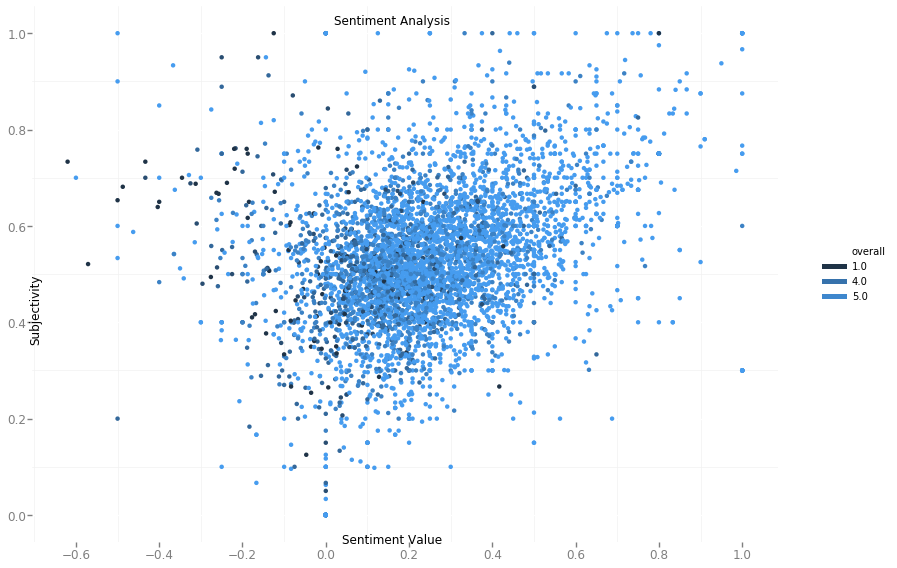

<ggplot: (287590976)>

In [52]:
# create a visualization using ggplot for sentiment value, subjectivity, and overall ratings
import ggplot
from ggplot import *

ggplot(aes(x='senti_value', y='subjectivity', color='overall'), data=amz_tb1) +\
    geom_point() +\
    theme_bw() +\
    xlab("Sentiment Value") +\
    ylab("Subjectivity") +\
    ggtitle("Sentiment Analysis")

In [53]:
# stats of overall, subjectivity, and sentiment value
amz_tb1.describe()

,overall,subjectivity,senti_value
count,5000.000000,5000.000000,5000.000000
mean,4.497000,0.530386,0.243730
std,0.866569,0.148541,0.205823
min,1.000000,0.000000,-0.620000
25%,4.000000,0.450000,0.120364
50%,5.000000,0.527038,0.223917
75%,5.000000,0.612336,0.359766
max,5.000000,1.000000,1.000000


/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


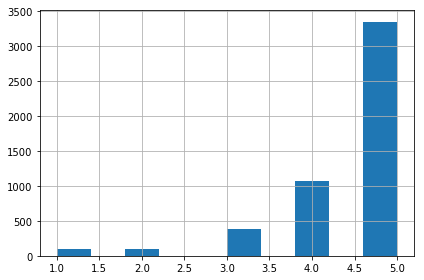

In [54]:
# histogram of overall ratings 
amz_tb1['overall'].hist()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


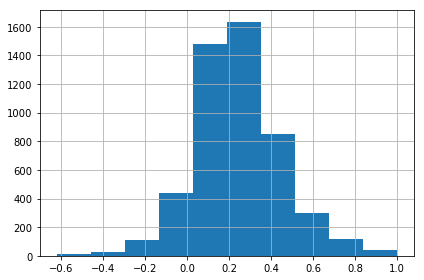

In [55]:
# histogram of sentiment values 
amz_tb1['senti_value'].hist()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


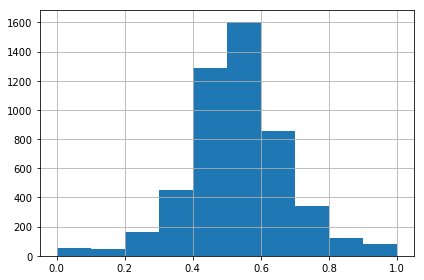

In [56]:
# histogram of subjectivity 
amz_tb1['subjectivity'].hist()

In [57]:
# print relevance of the word "enjoyed" in low polarity ranking clusters
print((2.7027027027027026+0.9216589861751152+0.6681514476614699+2.807017543859649)/4)

1.7748826700997342


In [58]:
# print relevance of the word "enjoyed" in high polarity ranking clusters
print((2.7450980392156863+0.8368200836820083+3.6057692307692304+4.526748971193416)/4)

2.928609081215085
